In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report



In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape for CNN (add channel dimension)
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
X_test  = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

Y_train = to_categorical(y_train, 10)
Y_test  = to_categorical(y_test, 10)

print("X_train:", X_train.shape, "Y_train:", Y_train.shape)
print("X_test :", X_test.shape, "Y_test :", Y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
X_train: (60000, 28, 28, 1) Y_train: (60000, 10)
X_test : (10000, 28, 28, 1) Y_test : (10000, 10)


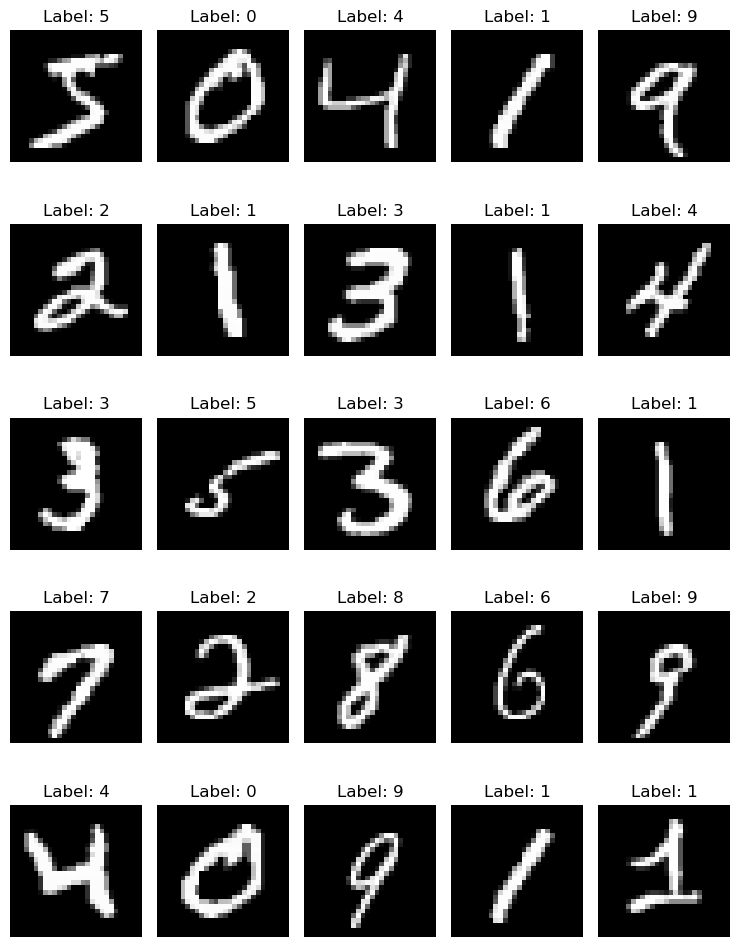

In [3]:
num = 25
images = X_train[:num]
labels = y_train[:num]

num_row, num_col = 5, 5
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col, 2*num_row))

for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i].squeeze(), cmap="gray")
    ax.set_title(f"Label: {labels[i]}")
    ax.axis("off")

plt.tight_layout()
plt.show()


In [4]:
def build_mnist_cnn():
    model = Sequential([
        Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
        MaxPooling2D((2,2)),
        Dropout(0.25),

        Conv2D(64, (3,3), activation="relu"),
        MaxPooling2D((2,2)),
        Dropout(0.25),

        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.5),
        Dense(10, activation="softmax")
    ])
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

model = build_mnist_cnn()
model.summary()


C:\Users\ducat\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(
    X_train, Y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.8589 - loss: 0.4442 - val_accuracy: 0.9708 - val_loss: 0.0989
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9554 - loss: 0.1490 - val_accuracy: 0.9812 - val_loss: 0.0662
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9676 - loss: 0.1080 - val_accuracy: 0.9846 - val_loss: 0.0487
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9732 - loss: 0.0910 - val_accuracy: 0.9878 - val_loss: 0.0426
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9760 - loss: 0.0779 - val_accuracy: 0.9889 - val_loss: 0.0413


MNIST Test Accuracy: 0.9889000058174133
MNIST Test Loss: 0.03288499265909195


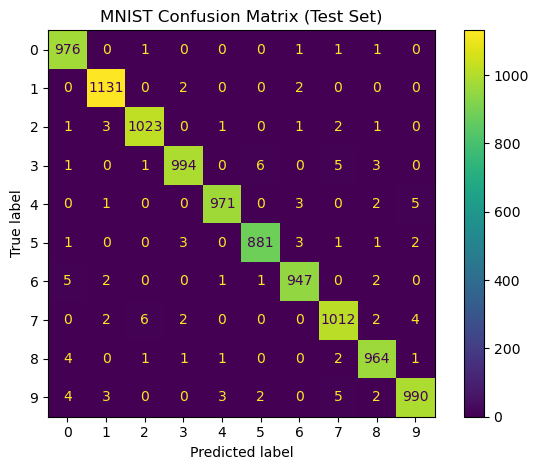

              precision    recall  f1-score   support

           0     0.9839    0.9959    0.9899       980
           1     0.9904    0.9965    0.9934      1135
           2     0.9913    0.9913    0.9913      1032
           3     0.9920    0.9842    0.9881      1010
           4     0.9939    0.9888    0.9913       982
           5     0.9899    0.9877    0.9888       892
           6     0.9896    0.9885    0.9890       958
           7     0.9844    0.9844    0.9844      1028
           8     0.9857    0.9897    0.9877       974
           9     0.9880    0.9812    0.9846      1009

    accuracy                         0.9889     10000
   macro avg     0.9889    0.9888    0.9888     10000
weighted avg     0.9889    0.9889    0.9889     10000



In [6]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print("MNIST Test Accuracy:", test_acc)
print("MNIST Test Loss:", test_loss)

y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot(values_format="d")
plt.title("MNIST Confusion Matrix (Test Set)")
plt.tight_layout()
plt.show()

print(classification_report(y_test, y_pred, digits=4))


In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

input_dir = r"C:\Users\ducat\Desktop\Machine Learning\Handwritten Digits"
output_dir = r"C:\Users\ducat\Desktop\Machine Learning\Handwritten Digits\processed_digits"
os.makedirs(output_dir, exist_ok=True)

processed_images = []
processed_filenames = []

for file in sorted(os.listdir(input_dir)):
    if file.lower().endswith((".jpg", ".jpeg", ".png")):
        path = os.path.join(input_dir, file)

        img = Image.open(path)

        # grayscale
        img = ImageOps.grayscale(img)

        # invert: white digit on black
        img = ImageOps.invert(img)

        # resize to MNIST size
        img = img.resize((28, 28))

        arr = np.array(img)
        processed_images.append(arr)
        processed_filenames.append(file)

        # save processed version
        img.save(os.path.join(output_dir, file))

processed_images = np.array(processed_images)
print("Processed images shape:", processed_images.shape)
print("Saved processed images to:", output_dir)
print("Files processed:", processed_filenames)


Processed images shape: (10, 28, 28)
Saved processed images to: C:\Users\ducat\Desktop\Machine Learning\Handwritten Digits\processed_digits
Files processed: ['digit 0.jpg', 'digit 1.jpg', 'digit 2.jpg', 'digit 3.jpg', 'digit 4.jpg', 'digit 5.jpg', 'digit 6.jpg', 'digit 7.jpg', 'digit 8.jpg', 'digit 9.jpg']


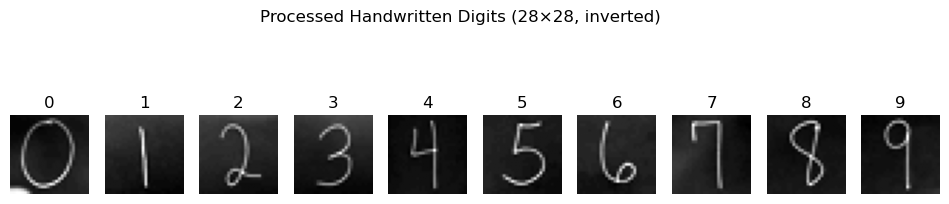

In [18]:
plt.figure(figsize=(12, 3))
for i in range(len(processed_images)):
    plt.subplot(1, len(processed_images), i + 1)
    plt.imshow(processed_images[i], cmap="gray")
    plt.title(str(i))
    plt.axis("off")
plt.suptitle("Processed Handwritten Digits (28×28, inverted)")
plt.show()


In [19]:
X_real = processed_images.reshape(processed_images.shape[0], 28, 28, 1).astype("float32") / 255.0


In [20]:
preds = model.predict(X_real)
pred_labels = np.argmax(preds, axis=1)
print("Predicted digits:", pred_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted digits: [0 1 1 1 1 1 1 1 1 1]


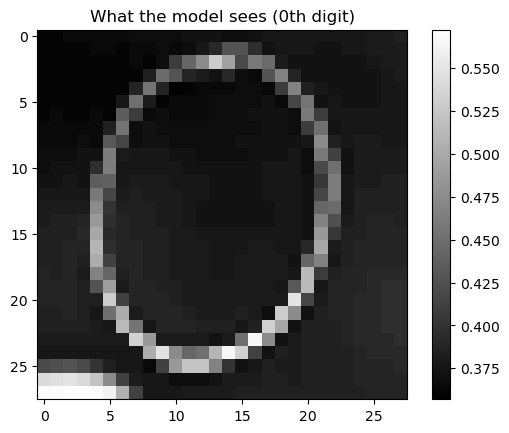

min: 0.35686275 max: 0.57254905 mean: 0.39143157


In [21]:
import matplotlib.pyplot as plt

plt.imshow(X_real[0].squeeze(), cmap="gray")
plt.colorbar()
plt.title("What the model sees (0th digit)")
plt.show()

print("min:", X_real[0].min(), "max:", X_real[0].max(), "mean:", X_real[0].mean())




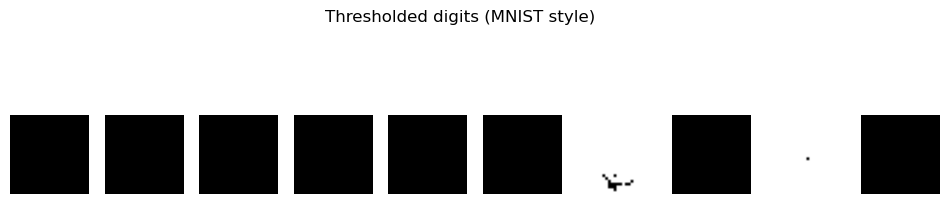

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted digits: [1 1 1 1 1 1 0 1 1 1]


In [22]:
from PIL import Image, ImageOps
import numpy as np

processed_images2 = []

for file in sorted(processed_filenames):
    path = os.path.join(input_dir, file)
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = ImageOps.invert(img)

    # Resize first
    img = img.resize((28, 28))

    arr = np.array(img).astype(np.uint8)

    # Threshold: make background black and digit white
    # adjust 80 if needed (try 60, 80, 100)
    arr = np.where(arr > 80, 255, 0).astype(np.uint8)

    processed_images2.append(arr)

processed_images2 = np.array(processed_images2)

plt.figure(figsize=(12, 3))
for i in range(len(processed_images2)):
    plt.subplot(1, len(processed_images2), i+1)
    plt.imshow(processed_images2[i], cmap="gray")
    plt.axis("off")
plt.suptitle("Thresholded digits (MNIST style)")
plt.show()

X_real2 = processed_images2.reshape(-1, 28, 28, 1).astype("float32") / 255.0
preds2 = model.predict(X_real2)
pred_labels2 = np.argmax(preds2, axis=1)
print("Predicted digits:", pred_labels2)


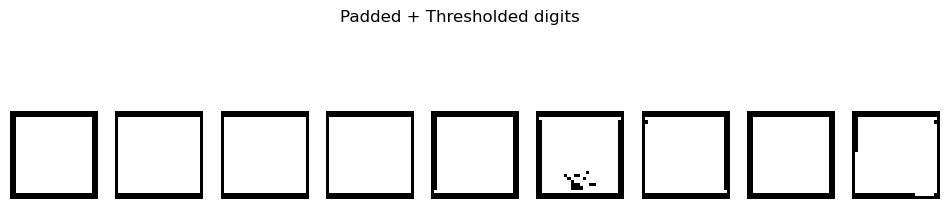

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted digits: [1 1 1 1 1 2 1 1 1]


In [14]:
from PIL import Image, ImageOps
import numpy as np

def preprocess_mnist_style(path, thresh=80):
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = ImageOps.invert(img)

    # Make bigger canvas first, then shrink to 28x28
    img = ImageOps.expand(img, border=20, fill=0)

    img = img.resize((28, 28))
    arr = np.array(img).astype(np.uint8)

    arr = np.where(arr > thresh, 255, 0).astype(np.uint8)
    return arr

processed_images3 = []
for file in sorted(processed_filenames):
    processed_images3.append(preprocess_mnist_style(os.path.join(input_dir, file), thresh=80))

processed_images3 = np.array(processed_images3)

plt.figure(figsize=(12, 3))
for i in range(len(processed_images3)):
    plt.subplot(1, len(processed_images3), i+1)
    plt.imshow(processed_images3[i], cmap="gray")
    plt.axis("off")
plt.suptitle("Padded + Thresholded digits")
plt.show()

X_real3 = processed_images3.reshape(-1, 28, 28, 1).astype("float32") / 255.0
preds3 = model.predict(X_real3)
pred_labels3 = np.argmax(preds3, axis=1)
print("Predicted digits:", pred_labels3)


In [15]:
true_labels = np.array([1,2,3,4,5,6,7,8,9])  # update if you add 0
acc = (pred_labels3 == true_labels).mean()
print("Accuracy on my handwritten digits:", acc)


Accuracy on my handwritten digits: 0.1111111111111111


In [16]:
for t, p, f in zip(true_labels, pred_labels3, processed_filenames):
    print(f"{f}: true={t}, predicted={p}")


digit 1.jpg: true=1, predicted=1
digit 2.jpg: true=2, predicted=1
digit 3.jpg: true=3, predicted=1
digit 4.jpg: true=4, predicted=1
digit 5.jpg: true=5, predicted=1
digit 6.jpg: true=6, predicted=2
digit 7.jpg: true=7, predicted=1
digit 8.jpg: true=8, predicted=1
digit 9.jpg: true=9, predicted=1


In [23]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
    --------------------------------------- 0.5/39.0 MB 8.7 MB/s eta 0:00:05
   ---- ----------------------------------- 3.9/39.0 MB 14.4 MB/s eta 0:00:03
   ------ --------------------------------- 6.0/39.0 MB 12.9 MB/s eta 0:00:03
   -------- ------------------------------- 8.7/39.0 MB 12.6 MB/s eta 0:00:03
   ----------- ---------------------------- 10.7/39.0 MB 11.9 MB/s eta 0:00:03
   ------------- -------------------------- 13.4/39.0 MB 12.0 MB/s eta 0:00:03
   ---------------- ----------------------- 16.3/39.0 MB 12.4 MB/s eta 0:00:02
   ------------------- -------------------- 18.9/39.0 MB 12.4 MB/s eta 0:00:02
   ---------------------- ----------------- 21.8/39.0 MB 12.6 MB/s eta 0:00:02
   ------------------------- -------------- 24.6/39.0 MB 12.7 MB/s eta 0:00:02
   --------------------------- ------------ 27.0/39.0 MB 12.5 MB/s eta 0:00:01
   ------------------------------ --------- 29.4/39.0 MB 12.4 MB/s

Processed shape: (10, 28, 28)
Saved to: C:\Users\ducat\Desktop\Machine Learning\Handwritten Digits\processed_digits_cv2
Files: ['digit 0.jpg', 'digit 1.jpg', 'digit 2.jpg', 'digit 3.jpg', 'digit 4.jpg', 'digit 5.jpg', 'digit 6.jpg', 'digit 7.jpg', 'digit 8.jpg', 'digit 9.jpg']


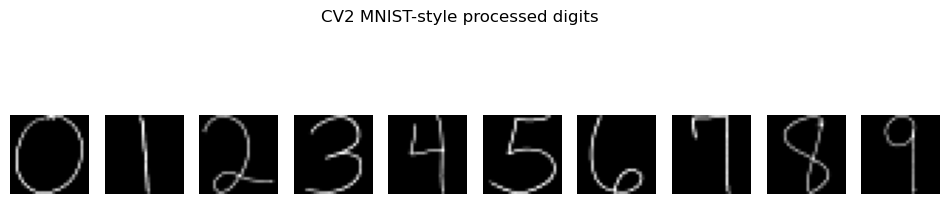

In [24]:
import os, glob
import numpy as np
import cv2
import matplotlib.pyplot as plt

input_dir = r"C:\Users\ducat\Desktop\Machine Learning\Handwritten Digits"
out_dir = os.path.join(input_dir, "processed_digits_cv2")
os.makedirs(out_dir, exist_ok=True)

def mnist_preprocess_cv2(img_path, out_path=None):
    # 1) read grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # 2) denoise slightly
    img = cv2.GaussianBlur(img, (5,5), 0)

    # 3) binarize (digit vs background) using Otsu
    # We want digit as white on black at the end, but for contour finding it's easier either way.
    _, th = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    # th now: digit is white, background black (usually)

    # 4) find largest connected component (the digit)
    cnts, _ = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not cnts:
        return None

    c = max(cnts, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(c)

    # 5) crop tightly to digit
    digit = th[y:y+h, x:x+w]

    # 6) pad to square
    size = max(w, h)
    pad_y = (size - h) // 2
    pad_x = (size - w) // 2
    digit_sq = cv2.copyMakeBorder(
        digit,
        top=pad_y, bottom=size - h - pad_y,
        left=pad_x, right=size - w - pad_x,
        borderType=cv2.BORDER_CONSTANT, value=0
    )

    # 7) add margin like MNIST (digit ~20x20 inside 28x28)
    digit_sq = cv2.copyMakeBorder(digit_sq, 4, 4, 4, 4, cv2.BORDER_CONSTANT, value=0)

    # 8) resize to 28x28
    digit_28 = cv2.resize(digit_sq, (28,28), interpolation=cv2.INTER_AREA)

    # 9) ensure final is white digit (255) on black (0) already
    # (If yours comes out inverted, flip it with: digit_28 = 255 - digit_28)

    if out_path:
        cv2.imwrite(out_path, digit_28)

    return digit_28

# Process all digit images
files = sorted(glob.glob(os.path.join(input_dir, "digit *.jpg")))  # change extension if png
processed = []
kept_files = []

for f in files:
    out_path = os.path.join(out_dir, os.path.basename(f))
    arr = mnist_preprocess_cv2(f, out_path)
    if arr is not None:
        processed.append(arr)
        kept_files.append(os.path.basename(f))

processed = np.array(processed)
print("Processed shape:", processed.shape)
print("Saved to:", out_dir)
print("Files:", kept_files)

# quick visual check
plt.figure(figsize=(12,3))
for i in range(len(processed)):
    plt.subplot(1, len(processed), i+1)
    plt.imshow(processed[i], cmap="gray")
    plt.axis("off")
plt.suptitle("CV2 MNIST-style processed digits")
plt.show()


In [25]:
X_real = processed.reshape(-1, 28, 28, 1).astype("float32") / 255.0
preds = model.predict(X_real)
pred_labels = np.argmax(preds, axis=1)
print("Predicted digits:", pred_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted digits: [3 1 2 3 4 5 6 4 4 7]


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np

# Lightweight CV-style evaluation function
def cnn_cv(learning_rate, dropout_rate, filters):
    filters = int(filters)

    model = Sequential([
        Conv2D(filters, (3,3), activation="relu", input_shape=(28,28,1)),
        MaxPooling2D((2,2)),
        Dropout(dropout_rate),
        Flatten(),
        Dense(64, activation="relu"),
        Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    # Use a SMALL subset for speed (this is fine for visualization)
    model.fit(
        X_train[:5000],
        Y_train[:5000],
        epochs=2,
        batch_size=128,
        verbose=0
    )

    _, acc = model.evaluate(X_test[:1000], Y_test[:1000], verbose=0)
    return acc



In [31]:
from bayes_opt import BayesianOptimization

optimizer = BayesianOptimization(
    f=cnn_cv,
    pbounds={
        "learning_rate": (0.0001, 0.01),
        "dropout_rate": (0.2, 0.5),
        "filters": (16, 64)
    },
    random_state=42,
    verbose=2
)

optimizer.maximize(init_points=3, n_iter=5)


|   iter    |  target   | learni... | dropou... |  filters  |
-------------------------------------------------------------


C:\Users\ducat\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 1         | 0.9449999 | 0.0038079 | 0.4852142 | 51.135709 |
| 2         | 0.9409999 | 0.0060267 | 0.2468055 | 23.487736 |
| 3         | 0.8840000 | 0.0006750 | 0.4598528 | 44.853520 |


C:\Users\ducat\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 4         | 0.9079999 | 0.0019000 | 0.3509628 | 32.415318 |


C:\Users\ducat\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 5         | 0.9049999 | 0.0021194 | 0.4316406 | 51.087679 |


C:\Users\ducat\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 6         | 0.9309999 | 0.0051193 | 0.2110389 | 18.592770 |


C:\Users\ducat\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 7         | 0.9240000 | 0.0046049 | 0.2640022 | 25.773823 |


C:\Users\ducat\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| 8         | 0.9549999 | 0.0069517 | 0.3141248 | 48.838659 |
